In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 100  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 5 * 10**3
lr = 1e-4

In [4]:
model.load_model("models/100DCallOption2.pth")

In [5]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 1.004e+02, Y0: 5.628, Time: 0.78, Learning Rate: 1.000e-04
It: 20000, Loss: 2.282e+01, Y0: 5.086, Time: 33.95, Learning Rate: 1.000e-04
It: 20100, Loss: 6.240e+01, Y0: 5.377, Time: 34.26, Learning Rate: 1.000e-04
It: 20200, Loss: 6.192e+01, Y0: 5.216, Time: 34.19, Learning Rate: 1.000e-04
It: 20300, Loss: 5.028e+01, Y0: 5.068, Time: 34.22, Learning Rate: 1.000e-04
It: 20400, Loss: 6.522e+01, Y0: 5.115, Time: 34.48, Learning Rate: 1.000e-04
It: 20500, Loss: 1.102e+01, Y0: 5.138, Time: 33.93, Learning Rate: 1.000e-04
It: 20600, Loss: 3.649e+01, Y0: 5.257, Time: 33.95, Learning Rate: 1.000e-04
It: 20700, Loss: 4.467e+01, Y0: 5.339, Time: 34.16, Learning Rate: 1.000e-04
It: 20800, Loss: 1.641e+01, Y0: 4.928, Time: 34.33, Learning Rate: 1.000e-04
It: 20900, Loss: 1.931e+02, Y0: 5.010, Time: 34.06, Learning Rate: 1.000e-04
It: 21000, Loss: 3.449e+01, Y0: 5.003, Time: 33.87, Learning Rate: 1.000e-04
It: 21100, Loss: 1.413e+01, Y0: 5.281, Time: 34.05, Learning Rate: 1.0

In [6]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
graph = model.iteration, model.training_loss

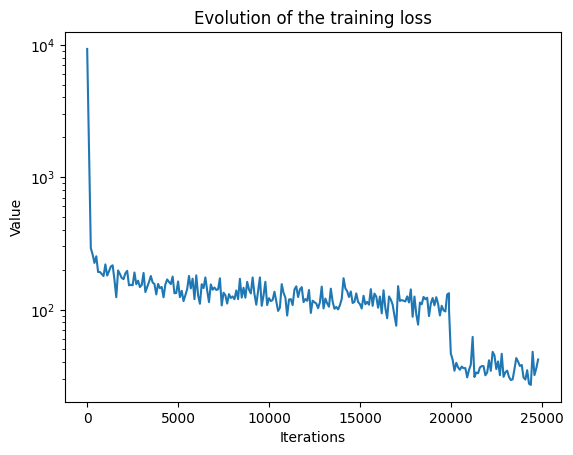

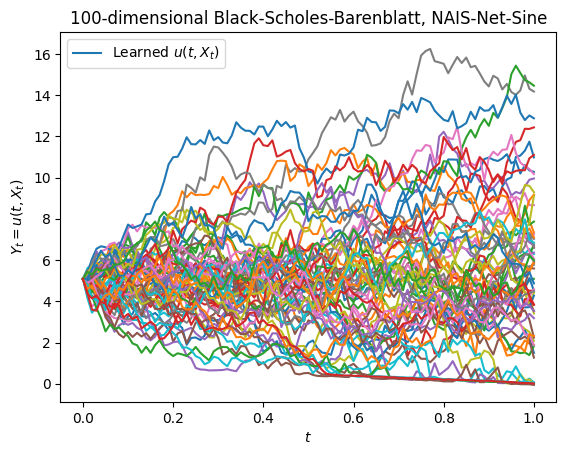

In [31]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [8]:
Y_pred.shape

(4096, 101, 1)

In [9]:
Y_preds = Y_pred.reshape(4096, 101)

In [10]:
time_stamps = t_test[0].reshape(101,)
time_stamps

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ], dtype=float32)

In [11]:
Y_preds[:,0][:,None]

array([[5.0894413],
       [5.0894413],
       [5.0894413],
       ...,
       [5.0894413],
       [5.0894413],
       [5.0894413]], dtype=float32)

In [12]:
Y_preds

array([[ 5.0894413 ,  5.1674757 ,  5.5482626 , ..., 11.303334  ,
        11.739202  , 10.976813  ],
       [ 5.0894413 ,  5.301326  ,  5.7239633 , ...,  2.103727  ,
         1.9438735 ,  1.8780205 ],
       [ 5.0894413 ,  4.793946  ,  4.6936965 , ...,  4.718843  ,
         5.0216823 ,  5.0909395 ],
       ...,
       [ 5.0894413 ,  5.4204364 ,  4.455981  , ...,  0.07179721,
         0.06249698,  0.06672689],
       [ 5.0894413 ,  5.137799  ,  4.711663  , ...,  9.024332  ,
         8.214035  ,  8.310448  ],
       [ 5.0894413 ,  5.6463037 ,  5.5249586 , ...,  5.426579  ,
         5.2975364 ,  4.5360827 ]], dtype=float32)

In [13]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

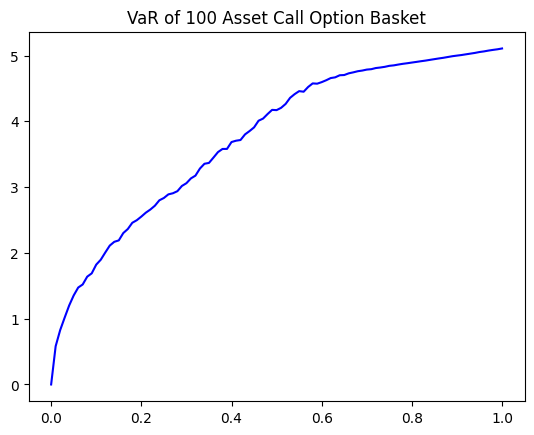

In [30]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')

In [15]:
r = 0.05

In [16]:
Y_preds[:,-1]

array([10.976813  ,  1.8780205 ,  5.0909395 , ...,  0.06672689,
        8.310448  ,  4.5360827 ], dtype=float32)

In [17]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.0896616, 5.077513 , 5.0890956, 5.086613 , 5.079972 , 5.0811243,
       5.084582 , 5.092173 , 5.0909257, 5.0933046, 5.0875177, 5.0843363,
       5.0711484, 5.0607977, 5.064638 , 5.072265 , 5.072421 , 5.0718446,
       5.073192 , 5.071225 , 5.0803385, 5.078624 , 5.0782714, 5.0916457,
       5.098939 , 5.1031866, 5.1139035, 5.1154733, 5.1170125, 5.1259575,
       5.1165752, 5.106674 , 5.1077256, 5.1063604, 5.0997834, 5.1019125,
       5.0967817, 5.100447 , 5.107199 , 5.1070843, 5.1136293, 5.1159906,
       5.1153865, 5.122153 , 5.1172233, 5.1102757, 5.103774 , 5.0988107,
       5.1076236, 5.106904 , 5.1126227, 5.121058 , 5.1190863, 5.123296 ,
       5.12461  , 5.1137214, 5.1147804, 5.1182036, 5.119076 , 5.130385 ,
       5.1388617, 5.1271706, 5.1233144, 5.107039 , 5.1076713, 5.1082673,
       5.1129045, 5.108325 , 5.112685 , 5.1219306, 5.1329293, 5.137393 ,
       5.1400723, 5.1318407, 5.1364484, 5.1307836, 5.1291986, 5.13052  ,
       5.138697 , 5.130065 , 5.134714 , 5.1558237, 

In [18]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [19]:
from scipy.stats import multivariate_normal as normal
dw_sample = normal.rvs(size=[40000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([40000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([40000, D]) * 1
factor = np.exp((0.05-(0.4**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.4 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [20]:
x_sample

array([[[1.        , 1.00824008, 0.95529334, ..., 0.69848233,
         0.68650611, 0.71113084],
        [1.        , 1.00134177, 0.93283743, ..., 1.0940092 ,
         1.16266949, 1.12229963],
        [1.        , 1.01898934, 1.02363461, ..., 0.57406478,
         0.58596845, 0.60067711],
        ...,
        [1.        , 0.91355995, 0.97742152, ..., 0.72235166,
         0.71145371, 0.72735119],
        [1.        , 1.05349854, 1.07489041, ..., 1.16074151,
         1.16406637, 1.12858728],
        [1.        , 1.0331    , 1.00846634, ..., 1.33401567,
         1.35260096, 1.33803399]],

       [[1.        , 1.07688105, 1.12101344, ..., 1.63547457,
         1.69613843, 1.57693475],
        [1.        , 1.01252389, 0.96721702, ..., 0.74149391,
         0.76157442, 0.79705409],
        [1.        , 1.00936666, 1.06952304, ..., 1.19259523,
         1.244398  , 1.17228923],
        ...,
        [1.        , 1.02688714, 1.02788763, ..., 1.3691854 ,
         1.41192112, 1.3651326 ],
        [1. 

In [21]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
portfolio

array([[[100.        , 100.4490106 , 100.40961344, ...,  97.05547141,
          97.33988755,  97.69463933]],

       [[100.        , 100.07464452,  99.94677536, ...,  94.59081925,
          95.31903241,  94.85695395]],

       [[100.        ,  99.60245366, 100.02828027, ..., 108.97999765,
         109.10909889, 108.87806839]],

       ...,

       [[100.        ,  99.70380786,  99.12971967, ..., 106.3390122 ,
         105.98593264, 106.1719237 ]],

       [[100.        , 100.24326506, 100.304049  , ..., 112.81953572,
         113.24364688, 113.6492907 ]],

       [[100.        ,  99.17838682,  98.75037213, ..., 108.06537087,
         108.83177566, 108.25335737]]])

In [22]:
portfolio = np.sum(x_sample, axis=1, keepdims=True)
payoff = np.maximum(portfolio - 100 * 1, 0)
average = np.mean(payoff, axis=0, keepdims=True)
mc_price = np.exp(-0.05 * 1) * average[:, :, 100]

In [23]:
mc_price

array([[5.08981535]])

In [24]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

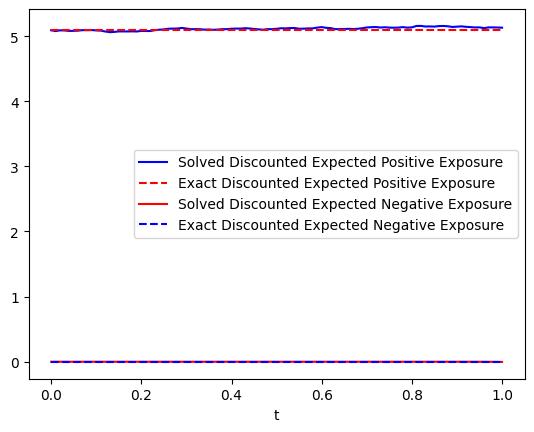

In [25]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [26]:
np.mean((epe_exact - epe)**2)

0.17902252661989715

In [26]:
model.save_model("models/100DCallOption.pth")